In [20]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [21]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
# torch.__version__
device

device(type='mps')

# Prepare training dataset

In [22]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [23]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [24]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [25]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [26]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [27]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [28]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [29]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [30]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [31]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [32]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 22.28it/s]                                                           


Epoch 1 of 100
Generator loss: 1.46325303, Discriminator loss: 0.88243683


118it [00:05, 22.77it/s]                                                           


Epoch 2 of 100
Generator loss: 3.16555790, Discriminator loss: 1.44277919


118it [00:05, 22.76it/s]                                                           


Epoch 3 of 100
Generator loss: 5.15495143, Discriminator loss: 0.22678300


118it [00:05, 23.02it/s]                                                           


Epoch 4 of 100
Generator loss: 3.40148803, Discriminator loss: 1.05245715


118it [00:05, 23.28it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


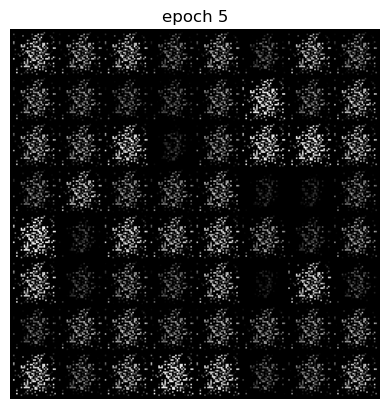

Epoch 5 of 100
Generator loss: 3.43615954, Discriminator loss: 0.87817463


118it [00:05, 22.74it/s]                                                           


Epoch 6 of 100
Generator loss: 1.50929851, Discriminator loss: 1.23627154


118it [00:05, 22.56it/s]                                                           


Epoch 7 of 100
Generator loss: 1.40854752, Discriminator loss: 1.08353647


118it [00:05, 22.88it/s]                                                           


Epoch 8 of 100
Generator loss: 2.33293005, Discriminator loss: 1.09779289


118it [00:05, 22.89it/s]                                                           


Epoch 9 of 100
Generator loss: 2.00858678, Discriminator loss: 0.85779138


118it [00:05, 23.03it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


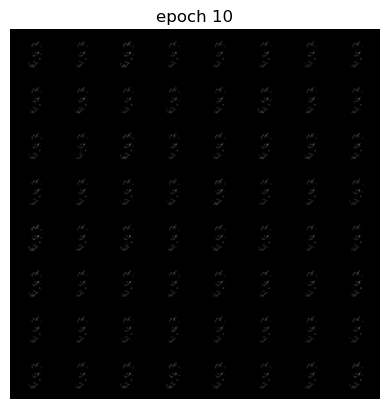

Epoch 10 of 100
Generator loss: 1.98839794, Discriminator loss: 1.03955874


118it [00:05, 23.17it/s]                                                           


Epoch 11 of 100
Generator loss: 1.76553959, Discriminator loss: 0.94629385


118it [00:05, 22.36it/s]                                                           


Epoch 12 of 100
Generator loss: 1.64065159, Discriminator loss: 0.88082446


118it [00:05, 22.61it/s]                                                           


Epoch 13 of 100
Generator loss: 3.65187329, Discriminator loss: 0.50833760


118it [00:05, 22.91it/s]                                                           


Epoch 14 of 100
Generator loss: 3.13529302, Discriminator loss: 0.49091623


118it [00:05, 22.96it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


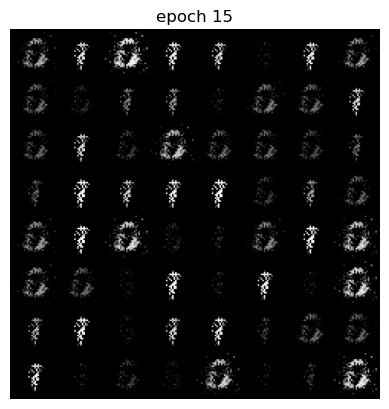

Epoch 15 of 100
Generator loss: 3.89966728, Discriminator loss: 0.40632907


118it [00:05, 23.14it/s]                                                           


Epoch 16 of 100
Generator loss: 3.86197835, Discriminator loss: 0.39825097


118it [00:05, 23.01it/s]                                                           


Epoch 17 of 100
Generator loss: 4.12601284, Discriminator loss: 0.28988658


118it [00:05, 22.28it/s]                                                           


Epoch 18 of 100
Generator loss: 4.24834615, Discriminator loss: 0.35703534


118it [00:05, 22.61it/s]                                                           


Epoch 19 of 100
Generator loss: 3.90213526, Discriminator loss: 0.43737864


118it [00:05, 23.33it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


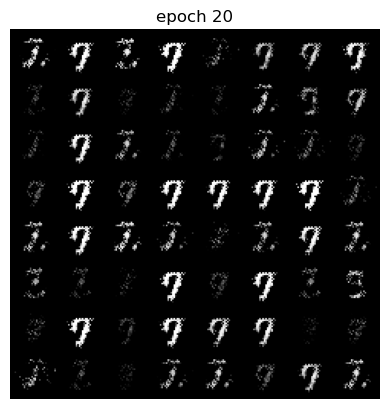

Epoch 20 of 100
Generator loss: 3.44735387, Discriminator loss: 0.45859691


118it [00:05, 23.09it/s]                                                           


Epoch 21 of 100
Generator loss: 4.17423526, Discriminator loss: 0.44237199


118it [00:05, 22.25it/s]                                                           


Epoch 22 of 100
Generator loss: 3.60374317, Discriminator loss: 0.48358713


118it [00:05, 22.94it/s]                                                           


Epoch 23 of 100
Generator loss: 3.49495762, Discriminator loss: 0.47906989


118it [00:05, 22.94it/s]                                                           


Epoch 24 of 100
Generator loss: 2.88859011, Discriminator loss: 0.63966570


118it [00:05, 22.84it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


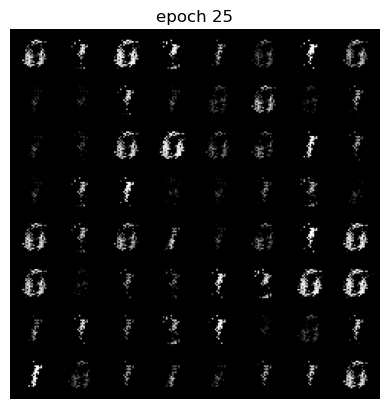

Epoch 25 of 100
Generator loss: 3.01212548, Discriminator loss: 0.63219254


118it [00:05, 22.90it/s]                                                           


Epoch 26 of 100
Generator loss: 3.22505122, Discriminator loss: 0.48907436


118it [00:05, 22.83it/s]                                                           


Epoch 27 of 100
Generator loss: 3.10181915, Discriminator loss: 0.49506078


118it [00:05, 22.65it/s]                                                           


Epoch 28 of 100
Generator loss: 3.44613016, Discriminator loss: 0.40444095


118it [00:05, 22.44it/s]                                                           


Epoch 29 of 100
Generator loss: 2.87579609, Discriminator loss: 0.61116996


118it [00:05, 23.22it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


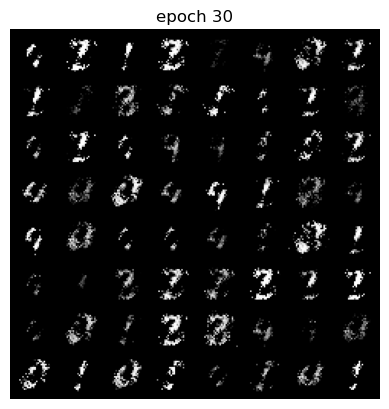

Epoch 30 of 100
Generator loss: 3.22448291, Discriminator loss: 0.49185712


118it [00:05, 23.34it/s]                                                           


Epoch 31 of 100
Generator loss: 3.17862220, Discriminator loss: 0.45997274


118it [00:05, 22.61it/s]                                                           


Epoch 32 of 100
Generator loss: 3.56631353, Discriminator loss: 0.45401811


118it [00:05, 22.35it/s]                                                           


Epoch 33 of 100
Generator loss: 3.59682530, Discriminator loss: 0.42379127


118it [00:05, 22.44it/s]                                                           


Epoch 34 of 100
Generator loss: 3.57548837, Discriminator loss: 0.39595245


118it [00:05, 22.48it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


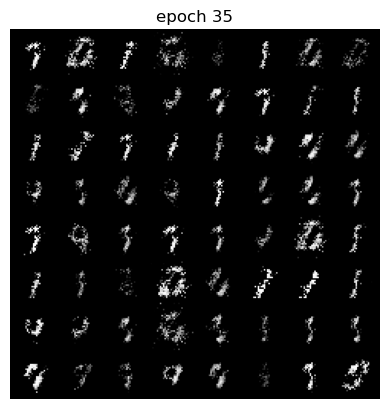

Epoch 35 of 100
Generator loss: 3.86471691, Discriminator loss: 0.32478733


118it [00:05, 21.93it/s]                                                           


Epoch 36 of 100
Generator loss: 4.08911932, Discriminator loss: 0.33482180


118it [00:05, 22.67it/s]                                                           


Epoch 37 of 100
Generator loss: 3.80892087, Discriminator loss: 0.39338154


118it [00:05, 22.87it/s]                                                           


Epoch 38 of 100
Generator loss: 3.78766090, Discriminator loss: 0.38950274


118it [00:05, 23.03it/s]                                                           


Epoch 39 of 100
Generator loss: 3.91087915, Discriminator loss: 0.38593995


118it [00:05, 22.88it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


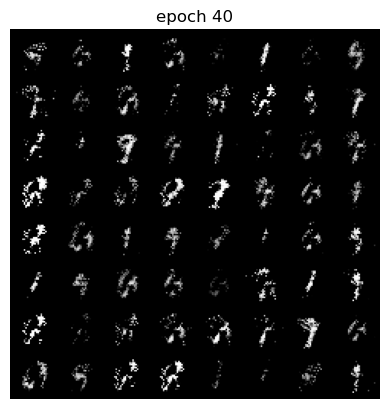

Epoch 40 of 100
Generator loss: 3.54057570, Discriminator loss: 0.44376901


118it [00:05, 22.82it/s]                                                           


Epoch 41 of 100
Generator loss: 3.69227741, Discriminator loss: 0.42544974


118it [00:05, 22.63it/s]                                                           


Epoch 42 of 100
Generator loss: 3.28662135, Discriminator loss: 0.48609670


118it [00:05, 22.85it/s]                                                           


Epoch 43 of 100
Generator loss: 3.64957205, Discriminator loss: 0.39521190


118it [00:05, 22.71it/s]                                                           


Epoch 44 of 100
Generator loss: 3.69848491, Discriminator loss: 0.40133930


118it [00:05, 22.48it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


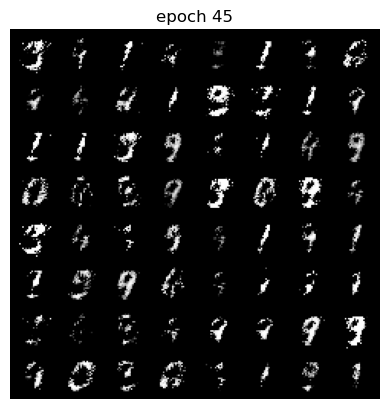

Epoch 45 of 100
Generator loss: 3.53697650, Discriminator loss: 0.42714369


118it [00:05, 22.79it/s]                                                           


Epoch 46 of 100
Generator loss: 3.39362600, Discriminator loss: 0.43858336


118it [00:05, 23.00it/s]                                                           


Epoch 47 of 100
Generator loss: 3.21019322, Discriminator loss: 0.41282699


118it [00:05, 22.24it/s]                                                           


Epoch 48 of 100
Generator loss: 3.93373882, Discriminator loss: 0.31335863


118it [00:05, 22.86it/s]                                                           


Epoch 49 of 100
Generator loss: 3.59387960, Discriminator loss: 0.48181713


118it [00:05, 23.09it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


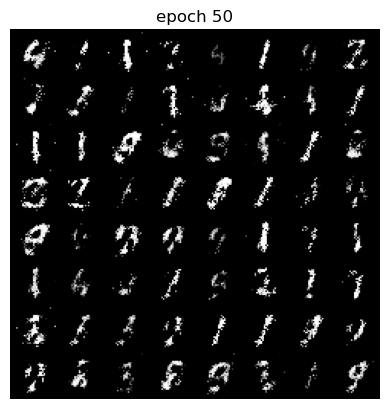

Epoch 50 of 100
Generator loss: 3.64402054, Discriminator loss: 0.44055424


118it [00:05, 23.17it/s]                                                           


Epoch 51 of 100
Generator loss: 3.38492956, Discriminator loss: 0.46781240


118it [00:05, 22.64it/s]                                                           


Epoch 52 of 100
Generator loss: 3.43457983, Discriminator loss: 0.41450959


118it [00:05, 22.52it/s]                                                           


Epoch 53 of 100
Generator loss: 3.34579054, Discriminator loss: 0.40499045


118it [00:05, 22.63it/s]                                                           


Epoch 54 of 100
Generator loss: 3.12760279, Discriminator loss: 0.47074631


118it [00:05, 22.90it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


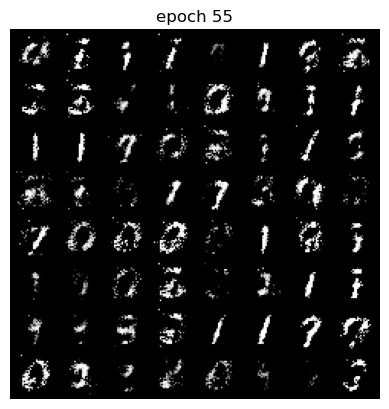

Epoch 55 of 100
Generator loss: 2.96405252, Discriminator loss: 0.53517146


118it [00:05, 23.03it/s]                                                           


Epoch 56 of 100
Generator loss: 3.05656665, Discriminator loss: 0.54791083


118it [00:05, 23.12it/s]                                                           


Epoch 57 of 100
Generator loss: 3.00445634, Discriminator loss: 0.51481325


118it [00:05, 22.81it/s]                                                           


Epoch 58 of 100
Generator loss: 2.97206408, Discriminator loss: 0.50302611


118it [00:05, 22.60it/s]                                                           


Epoch 59 of 100
Generator loss: 3.02478580, Discriminator loss: 0.46446472


118it [00:05, 22.96it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


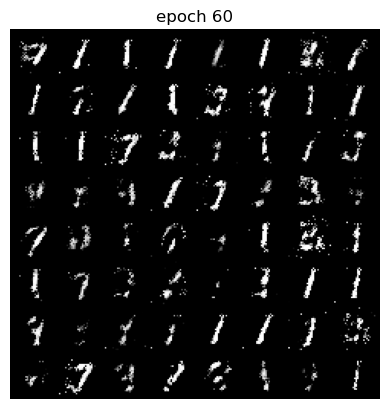

Epoch 60 of 100
Generator loss: 3.02480629, Discriminator loss: 0.45906227


118it [00:05, 23.12it/s]                                                           


Epoch 61 of 100
Generator loss: 3.11304864, Discriminator loss: 0.46739622


118it [00:05, 23.32it/s]                                                           


Epoch 62 of 100
Generator loss: 3.08982809, Discriminator loss: 0.46970279


118it [00:05, 23.20it/s]                                                           


Epoch 63 of 100
Generator loss: 2.88722079, Discriminator loss: 0.53528785


118it [00:05, 22.88it/s]                                                           


Epoch 64 of 100
Generator loss: 2.80299955, Discriminator loss: 0.52398876


118it [00:05, 22.41it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


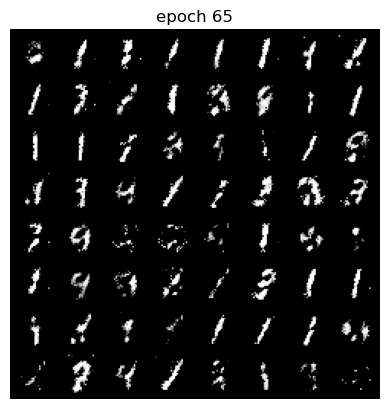

Epoch 65 of 100
Generator loss: 2.74104306, Discriminator loss: 0.56848427


118it [00:05, 22.29it/s]                                                           


Epoch 66 of 100
Generator loss: 2.66916080, Discriminator loss: 0.57871250


118it [00:05, 22.86it/s]                                                           


Epoch 67 of 100
Generator loss: 2.61188801, Discriminator loss: 0.60531783


118it [00:05, 22.84it/s]                                                           


Epoch 68 of 100
Generator loss: 2.72260377, Discriminator loss: 0.56248311


118it [00:05, 23.19it/s]                                                           


Epoch 69 of 100
Generator loss: 2.62077692, Discriminator loss: 0.57964354


118it [00:05, 23.11it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


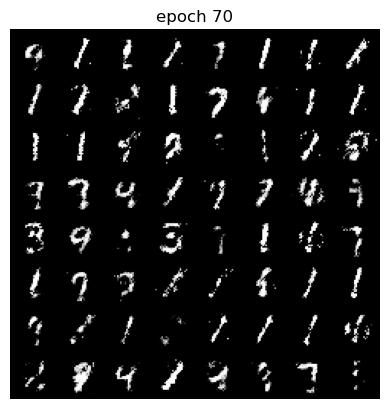

Epoch 70 of 100
Generator loss: 2.61336378, Discriminator loss: 0.57769540


118it [00:05, 23.07it/s]                                                           


Epoch 71 of 100
Generator loss: 2.63083286, Discriminator loss: 0.56118209


118it [00:05, 22.20it/s]                                                           


Epoch 72 of 100
Generator loss: 2.60712166, Discriminator loss: 0.56061016


118it [00:05, 22.22it/s]                                                           


Epoch 73 of 100
Generator loss: 2.49693150, Discriminator loss: 0.62967784


118it [00:05, 22.04it/s]                                                           


Epoch 74 of 100
Generator loss: 2.48409086, Discriminator loss: 0.61975414


118it [00:05, 21.32it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


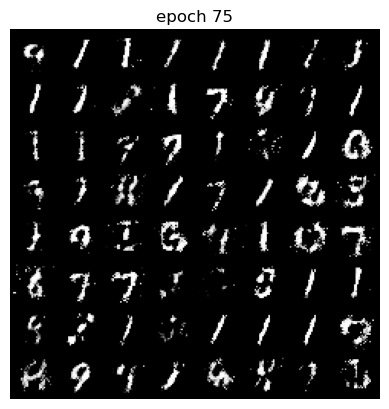

Epoch 75 of 100
Generator loss: 2.50752552, Discriminator loss: 0.64453158


118it [00:05, 21.68it/s]                                                           


Epoch 76 of 100
Generator loss: 2.40541910, Discriminator loss: 0.63036404


118it [00:05, 21.67it/s]                                                           


Epoch 77 of 100
Generator loss: 2.46082589, Discriminator loss: 0.64074975


118it [00:05, 20.84it/s]                                                           


Epoch 78 of 100
Generator loss: 2.42430135, Discriminator loss: 0.68137123


118it [00:05, 20.81it/s]                                                           


Epoch 79 of 100
Generator loss: 2.35703470, Discriminator loss: 0.72374848


118it [00:05, 21.81it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


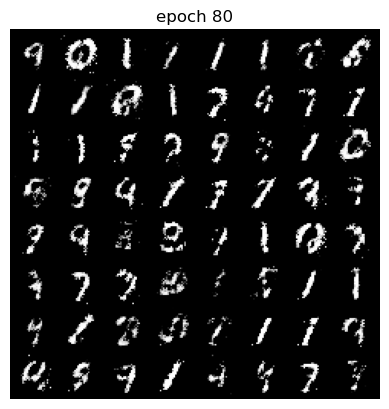

Epoch 80 of 100
Generator loss: 2.30540253, Discriminator loss: 0.71187038


118it [00:05, 21.72it/s]                                                           


Epoch 81 of 100
Generator loss: 2.43575550, Discriminator loss: 0.65071095


118it [00:05, 21.83it/s]                                                           


Epoch 82 of 100
Generator loss: 2.34435569, Discriminator loss: 0.69055662


118it [00:05, 21.73it/s]                                                           


Epoch 83 of 100
Generator loss: 2.27328583, Discriminator loss: 0.69384736


118it [00:05, 21.70it/s]                                                           


Epoch 84 of 100
Generator loss: 2.24568463, Discriminator loss: 0.68985679


118it [00:05, 21.80it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


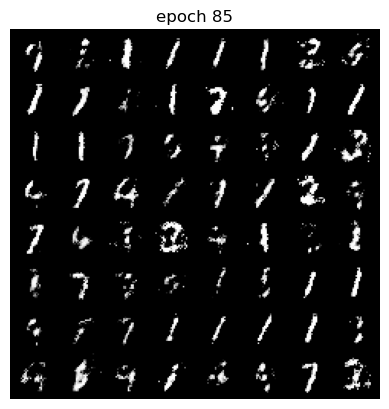

Epoch 85 of 100
Generator loss: 2.27791633, Discriminator loss: 0.67817465


118it [00:05, 22.09it/s]                                                           


Epoch 86 of 100
Generator loss: 2.25227410, Discriminator loss: 0.66820755


118it [00:05, 21.65it/s]                                                           


Epoch 87 of 100
Generator loss: 2.24215843, Discriminator loss: 0.71947386


118it [00:05, 21.50it/s]                                                           


Epoch 88 of 100
Generator loss: 2.23812812, Discriminator loss: 0.71712318


118it [00:05, 21.88it/s]                                                           


Epoch 89 of 100
Generator loss: 2.26278422, Discriminator loss: 0.69742760


118it [00:05, 21.75it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


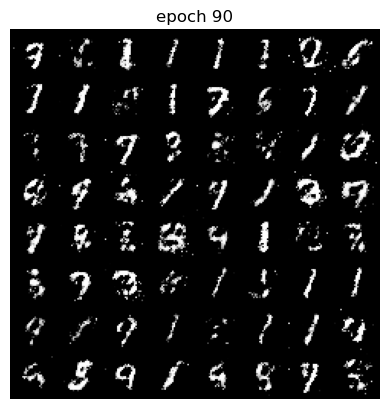

Epoch 90 of 100
Generator loss: 2.15720905, Discriminator loss: 0.75048305


118it [00:05, 22.04it/s]                                                           


Epoch 91 of 100
Generator loss: 2.18320438, Discriminator loss: 0.71631370


118it [00:05, 21.59it/s]                                                           


Epoch 92 of 100
Generator loss: 2.11077259, Discriminator loss: 0.74516427


118it [00:05, 21.83it/s]                                                           


Epoch 93 of 100
Generator loss: 2.13743406, Discriminator loss: 0.76371563


118it [00:05, 20.70it/s]                                                           


Epoch 94 of 100
Generator loss: 2.10193324, Discriminator loss: 0.75882590


118it [00:05, 21.74it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


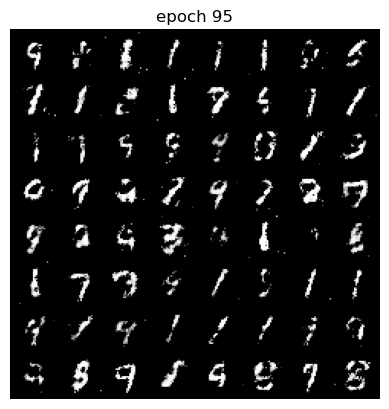

Epoch 95 of 100
Generator loss: 2.03153697, Discriminator loss: 0.77492214


118it [00:05, 21.48it/s]                                                           


Epoch 96 of 100
Generator loss: 2.06170123, Discriminator loss: 0.76838656


118it [00:05, 21.40it/s]                                                           


Epoch 97 of 100
Generator loss: 2.06126486, Discriminator loss: 0.76228084


118it [00:05, 20.86it/s]                                                           


Epoch 98 of 100
Generator loss: 1.99432608, Discriminator loss: 0.77588254


118it [00:05, 21.80it/s]                                                           


Epoch 99 of 100
Generator loss: 1.96605398, Discriminator loss: 0.80530087


118it [00:05, 21.65it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


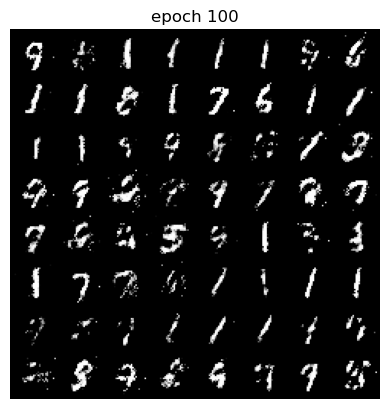

Epoch 100 of 100
Generator loss: 2.00114084, Discriminator loss: 0.78980631


In [33]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    

    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # print(bi, len(data[0]))
        real_labels = label_real(len(data[0]))
        fake_labels = label_fake(len(data[0]))
        
        
        real_images = data[0].to(device)
        
        
        z = create_noise(len(data[0]), nz)
        generated_images = generator(z)
        discriminator.zero_grad()
        d_loss_real = criterion(discriminator(real_images), real_labels)
        d_loss_fake = criterion(discriminator(generated_images.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake
        loss_d += d_loss.item()
        d_loss.backward()
        optim_d.step()
        
        z = create_noise(len(data[0]), nz)
        generated_images = generator(z)
        generator.zero_grad()
        g_loss = generator_loss(discriminator(generated_images), real_labels)
        loss_g += g_loss.item()
        g_loss.backward()
        optim_g.step()
        
        
        
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [34]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [35]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

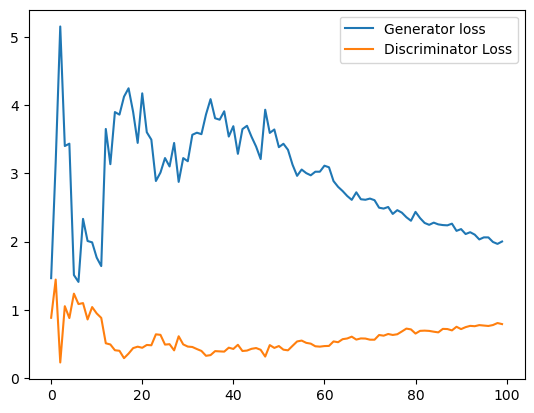

In [36]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')